# 1. Cleaning & Exploring the data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean

In [2]:
# For visualizations
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("../Data/marketing_campaign.csv", sep='\t', encoding = "ISO-8859-1", keep_default_na=False)

### I. First view of the dataset

In [4]:
df.head(11) # There are some empty cells in the Income column...

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.dtypes
# Except Income & Dt_Customer all the columns are in the desired format

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
dtype: object

In [7]:
df['Income'] = pd.to_numeric(df['Income'])

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

### II. Removing empty values

In [10]:
# First, I need to replace the empty cells with NaNs
df = df.replace(r'^\s*$', np.NaN, regex=True) 

In [11]:
df.head(11)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [12]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

I have 24 NaN values in my the Income column which I need to replace with either the mean, the median or mode:

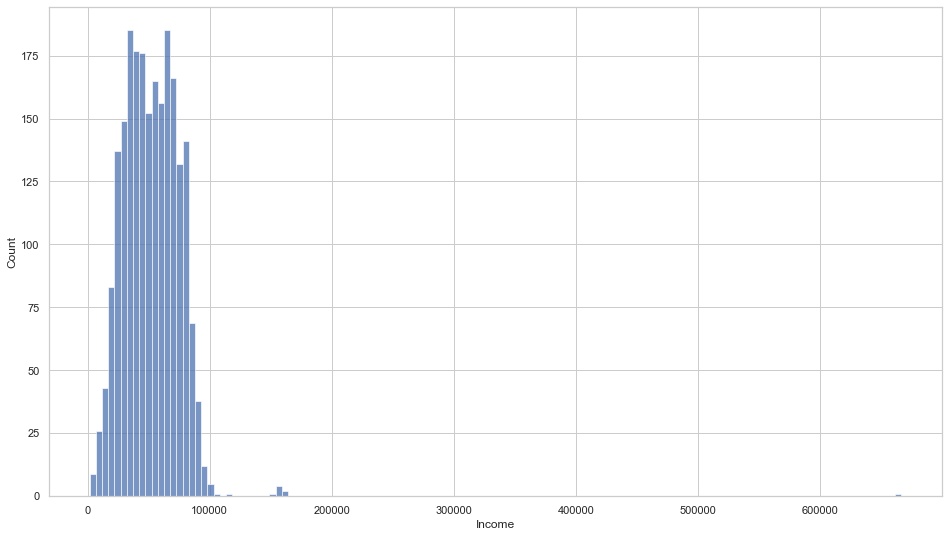

In [13]:
# Checking how the data is distributed
sns.histplot(x = df['Income']);

<AxesSubplot:xlabel='Income'>

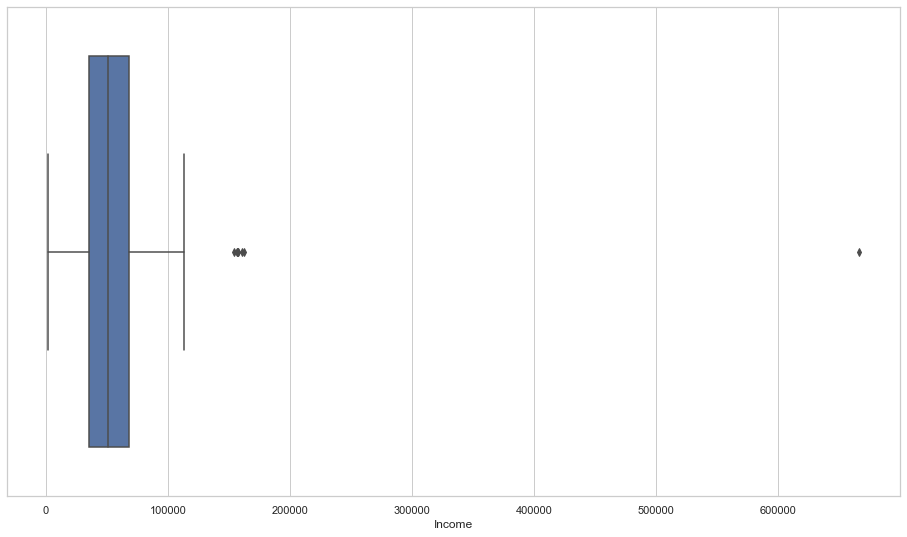

In [14]:
sns.boxplot(x = df['Income'])

There are some outliers which are going to affect my mean, so I need to calculate the mean without considering those numbers.

In [15]:
# Using the method of trimmed mean to remove the outliers
trim_mean(df['Income'], 0.1)

52143.19977678572

In [16]:
# Lower than the mean of the income with the outliers
df['Income'].mean()

52247.25135379061

In [17]:
df['Income'].fillna((trim_mean(df['Income'], 0.1).mean()), inplace = True)

In [18]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### III. Exploring the data per column

1. From the people attributes I will keep most of the columns except for the ID, which for my analysis it does not add me any value and I can identify my customer with the index number.

In [19]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
df['Marital_Status'].value_counts()
# The attributes of Alone, Absurd & YOLO I can move them to Single

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'}, inplace = True)

In [22]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

2. Then, the products bought columns for the moment I am going to keep all of them as they might give me key info about people's preferences around food.

3. Then, for the promotion columns, let's examine all the columns 'Accepted Campaign' columns, which I have 5, to see if I need them or not:

In [23]:
df['NumDealsPurchases'].value_counts()

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [24]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [25]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

In [26]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [27]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

In [28]:
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

In [29]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

The 'AcceptedCmp#' and the 'Response' columns do not give much value to the analysis so I will just keep the 'NumDealsPurchases' column.

4. For the place related columns I will keep all of them as well for the moment. 

5. Finally, let's examine the columns of 'Complain', Z_CostContact' & 'Z_Revenue'

In [30]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [31]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [32]:
df['Complain'].value_counts()
# There are only 21 complains over the last 2 years so I can also remove this column for my analysis

0    2219
1      21
Name: Complain, dtype: int64

They do not add that much value so I will also remove them.

In [33]:
df.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Z_CostContact', 'Z_Revenue', 'Complain'], inplace = True)

In [34]:
df.shape

(2240, 19)

In [35]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5


Also, for my kidhome & teenhome columns I can merge both of them as overall I am interested in knowing if they have children or not, not the age of the children. In another case it would serve me to know the age of the customer, but I already have the year of birth.

In [36]:
sum_columns = df['Kidhome'] + df['Teenhome']

In [37]:
df['Kids'] = sum_columns

In [38]:
df.drop(columns = ['Kidhome', 'Teenhome'], inplace = True)

In [39]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kids
0,1957,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0
1,1954,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,2
2,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0
3,1984,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,1
4,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,1


In [40]:
df.shape

(2240, 18)

In [41]:
df['Kids'].value_counts()

1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64

Then, I would also like to see the total products bought over the last 2 years by customer, so I need to create another column with this info: `TotalProductsL2Y`

In [45]:
df['TotalProductsL2Y'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [46]:
df.sample()

,Dt_Customer,Recency,Year_Birth,Income,Education,Marital_Status,Kids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,TotalProductsL2Y
528,2012-12-08,20,1964,61839.0,Graduation,Single,0,1000,155,379,224,17,120,1,4,8,4,8,1895


Finally, let's sort the columns accordingly

In [42]:
df = df[['Dt_Customer', 'Recency', 'Year_Birth', 'Income', 'Education', 'Marital_Status', 'Kids', 'TotalProductsL2Y', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']]

In [43]:
df.shape

(2240, 18)

In [44]:
df.head()

,Dt_Customer,Recency,Year_Birth,Income,Education,Marital_Status,Kids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth
0,2012-04-09,58,1957,58138.0,Graduation,Single,0,635,88,546,172,88,88,3,4,10,8,7
1,2014-08-03,38,1954,46344.0,Graduation,Single,2,11,1,6,2,1,6,2,2,1,1,5
2,2013-08-21,26,1965,71613.0,Graduation,Together,0,426,49,127,111,21,42,1,10,2,8,4
3,2014-10-02,26,1984,26646.0,Graduation,Together,1,11,4,20,10,3,5,2,4,0,2,6
4,2014-01-19,94,1981,58293.0,PhD,Married,1,173,43,118,46,27,15,5,6,3,5,5
